# 필수 라이브러리 로딩

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from warnings import filterwarnings
import warnings

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import warnings
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

# 한글 폰트 설정
mpl.rc('font', family='malgun gothic')

# 시각화 차트에 음수설정
mpl.rc('axes', unicode_minus = False)

# 오류경고
warnings.filterwarnings('ignore')



import seaborn as sns

# 차트 스타일지정     글꼴                    음수처리                        눈금
#sns.set(font = 'malgun ghthic', rc={'axes.unicode_minus':False}, style = 'darkgrid')
sns.set(font = 'D2coding', rc = {'axes.unicode_minus':False}, style = 'darkgrid')
plt.rc('figure', figsize=(10, 8))

# 데이터 로딩

In [3]:
df = pd.read_excel('C:/k_digital/source/data/Online_Retail.xlsx')
df2 = df.copy()

- InvoiceNo: 주문번호 
- StockCode: 상품코드
- Description: 상품명
- Quantity: 수량
- InvoiceDate: 주문날짜
- UnitPrice: 상품가격
- CustomerID: 고객 아디이
- Country: 고객거주지역


In [5]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


## 데이터 기초 정보 확인

In [6]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


- CustomerID 에 누락된 값이 존재한다.
- 이는 비회원의 상품구매에 따른 누락으로 추정된다.




In [8]:
df.iloc[:, -1].value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [9]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


- 상품의 수량과 가격의 최소값에 음수가 나와 있다.
- 이는 이상치로 판단하여 제거해주는 것이 좋아 보인다.

In [10]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [11]:
#pip install missingno
import missingno as msno

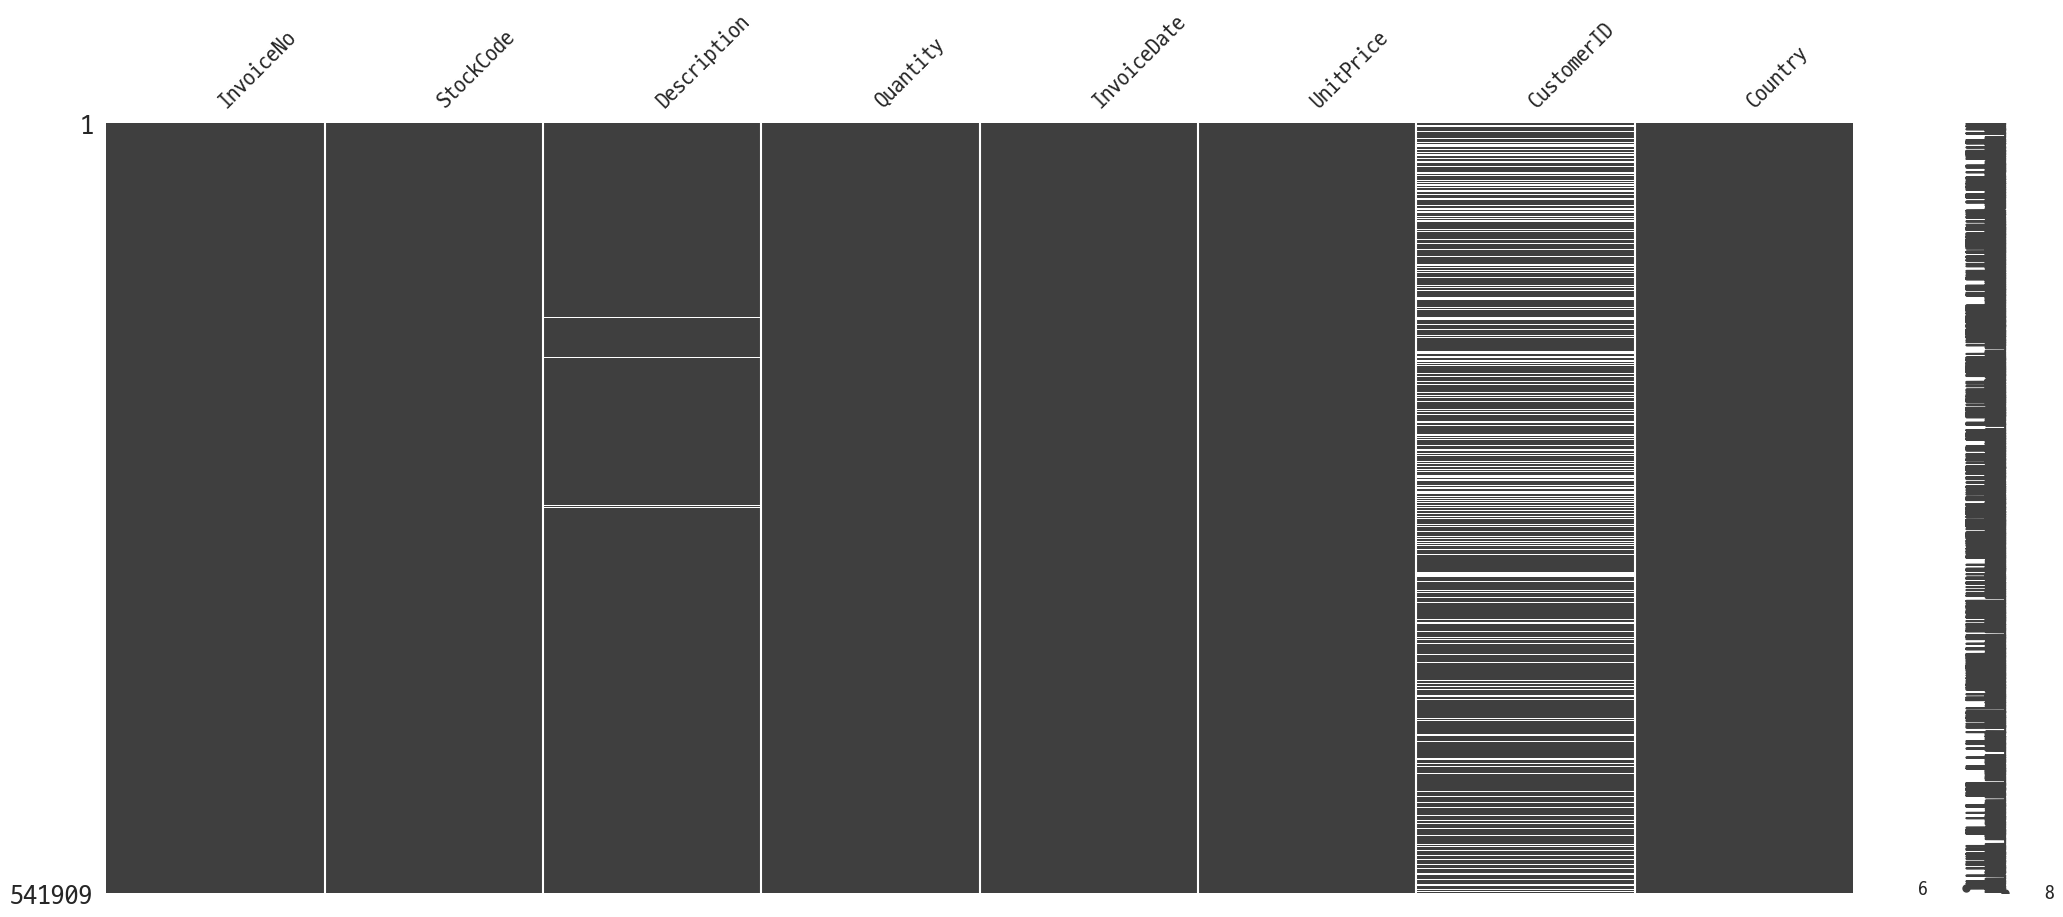

In [13]:
# 결측값 시각화
msno.matrix(df)
plt.show()

## Data Cleansing

In [14]:
# 누락된 고객ID 컬럼에 누락행을 제거
df = df[df.CustomerID.notnull()]

In [15]:
len(df)

406829

In [16]:
# Quantity와 UnitPrice 컬럼에 음수 행 제거
df = df[df.Quantity > 0]
df = df[df.UnitPrice > 0]
len(df)

397884

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In [19]:
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [20]:
df.CustomerID = df.CustomerID.astype(np.int32)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  int32         
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 25.8+ MB


In [21]:
df.CustomerID = df.CustomerID.astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  category      
 7   Country      397884 non-null  object        
dtypes: category(1), datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 25.2+ MB


- df.CustomerID = pod.to_numeric(df.CustomerID, downcast='integer') # int16

In [22]:
df['Price'] = df.Quantity * df.UnitPrice
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [23]:
# 정제 완료된 데이터 저장
df.to_csv('online_retail.csv', index=False)

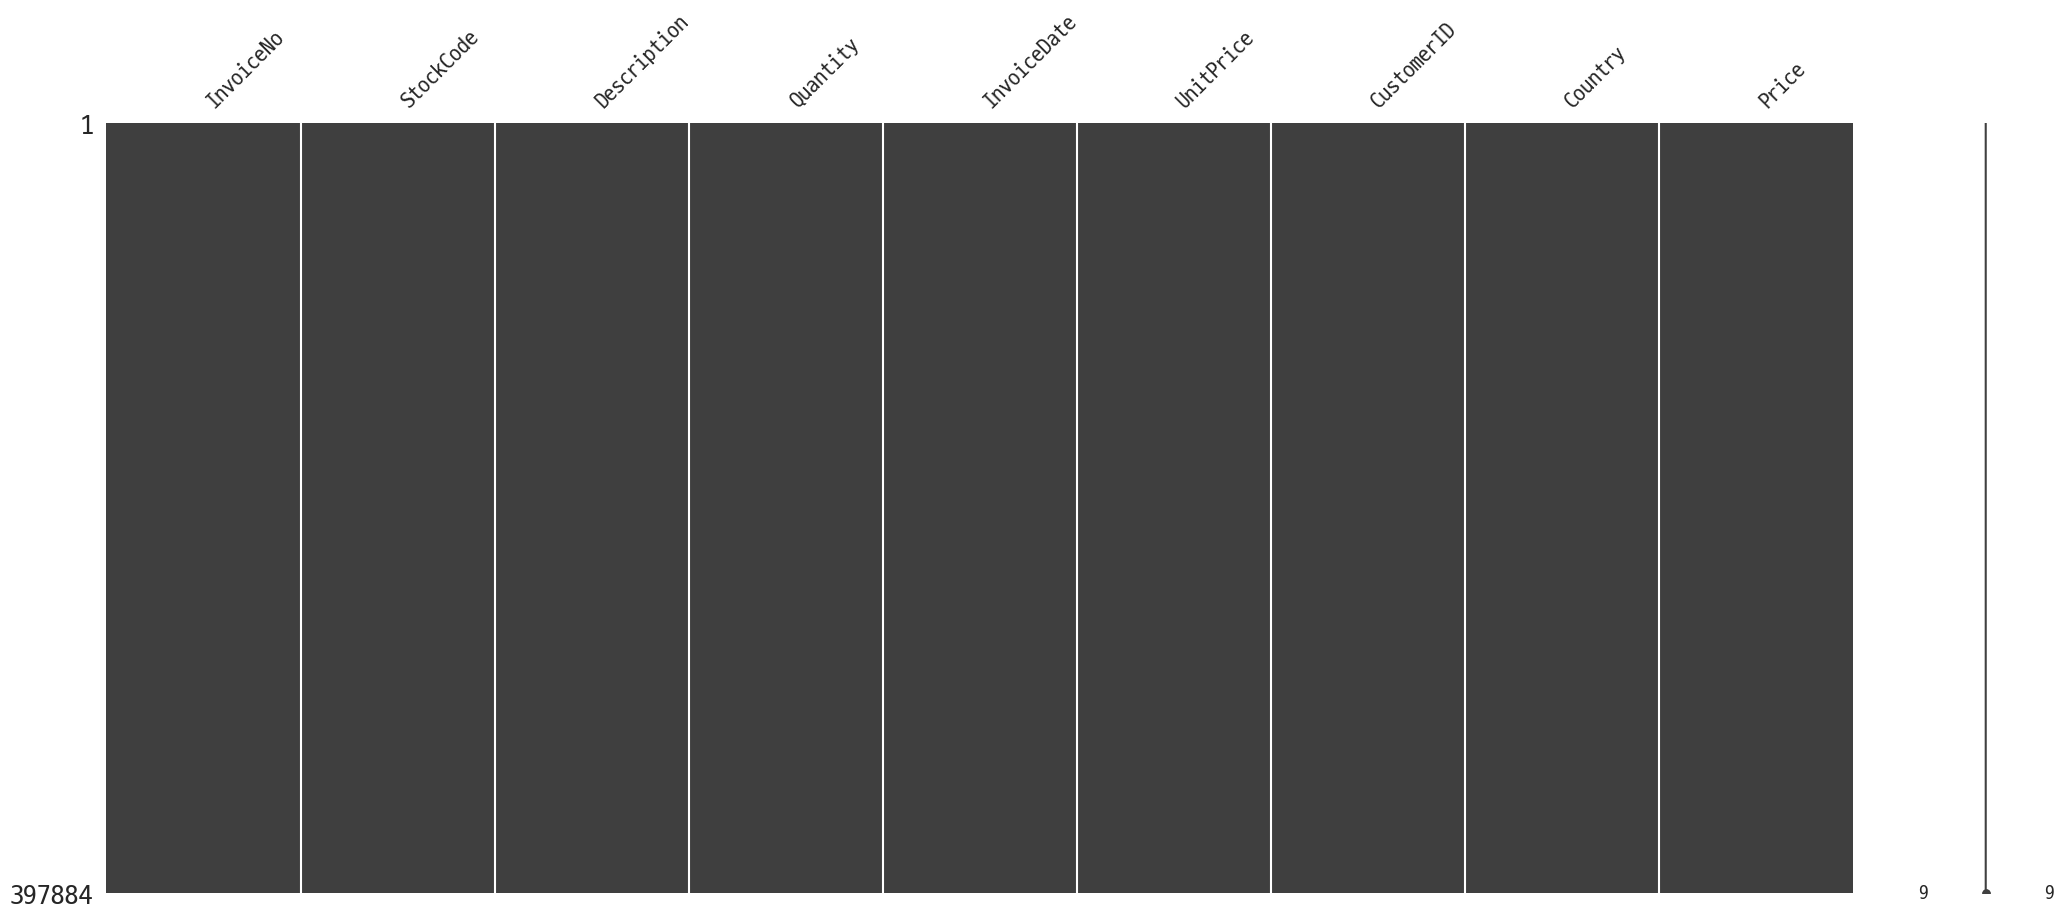

In [26]:
msno.matrix(df)
plt.show()

# 전체 매출과 국가별 매출 분석

In [24]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Price'],
      dtype='object')

In [25]:
# 전체 매출
total_revenue = df.iloc[:,-1].sum()
total_revenue

8911407.904

In [28]:
# 국가별 매출
rev_by_countries = df.groupby('Country')['Price'].sum().sort_values(ascending = False)
rev_by_countries

Country
United Kingdom          7308391.554
Netherlands              285446.340
EIRE                     265545.900
Germany                  228867.140
France                   209024.050
Australia                138521.310
Spain                     61577.110
Switzerland               56443.950
Belgium                   41196.340
Sweden                    38378.330
Japan                     37416.370
Norway                    36165.440
Portugal                  33439.890
Finland                   22546.080
Singapore                 21279.290
Channel Islands           20450.440
Denmark                   18955.340
Italy                     17483.240
Cyprus                    13590.380
Austria                   10198.680
Poland                     7334.650
Israel                     7221.690
Greece                     4760.520
Iceland                    4310.000
Canada                     3666.380
USA                        3580.390
Malta                      2725.590
Unspecified         

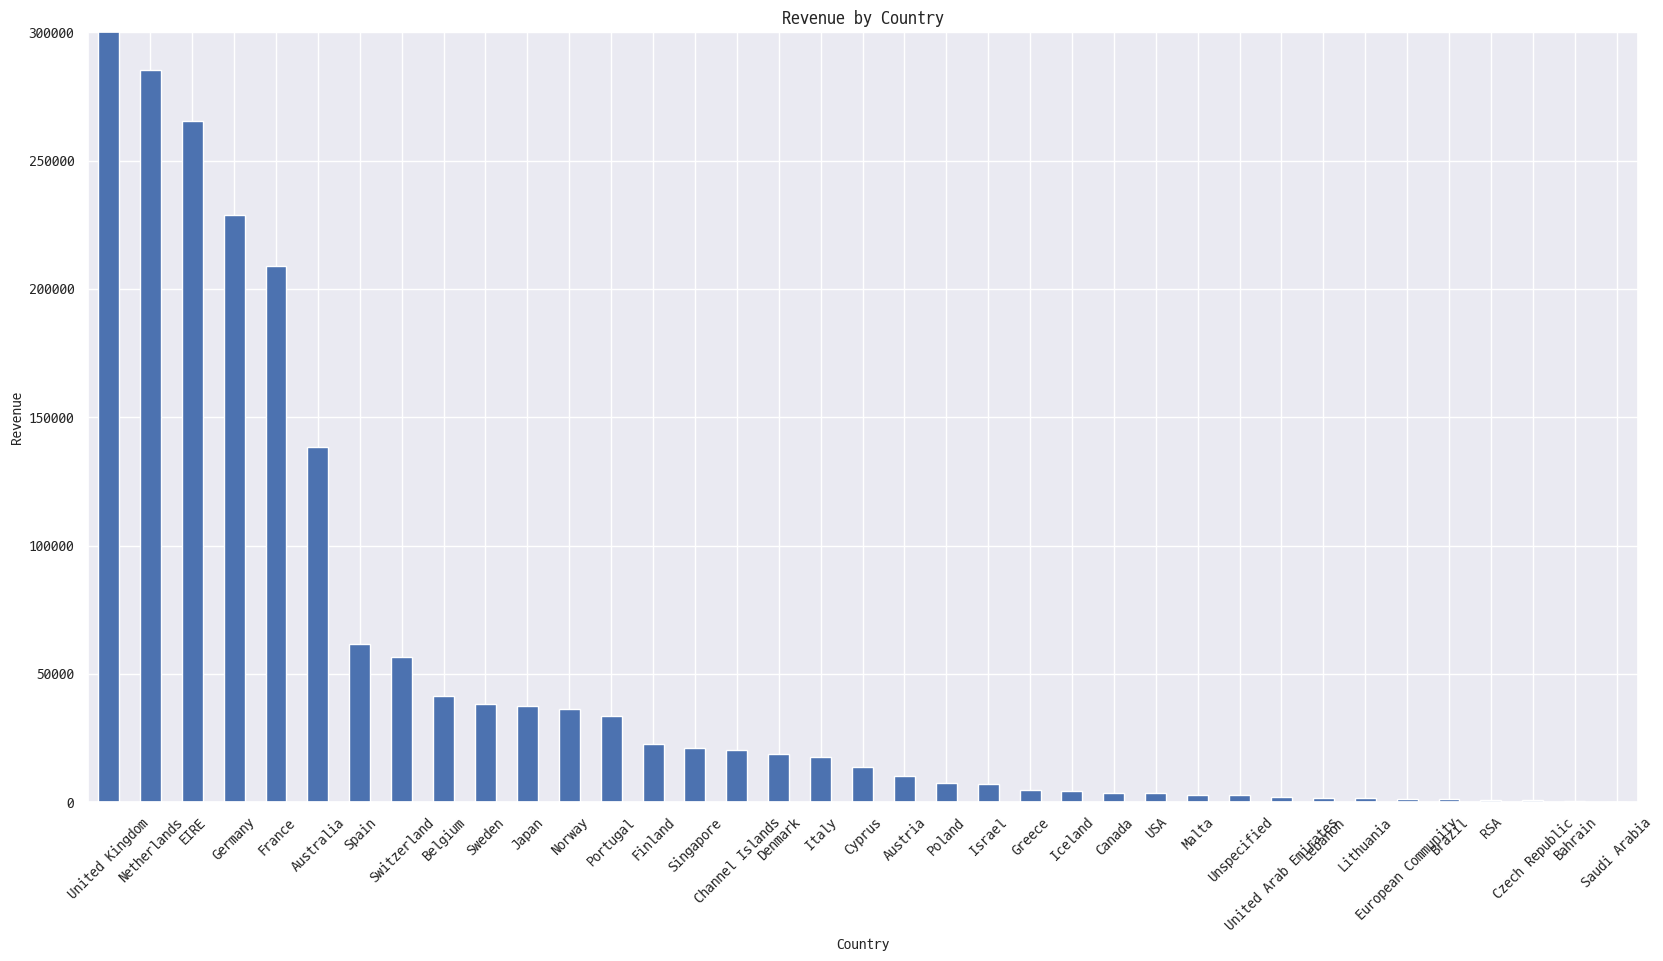

In [35]:
# 국가별 매출 시각화
plot = rev_by_countries.plot(kind='bar',figsize=(20,10))
plot.set_xlabel('Country',fontsize=11)
plot.set_ylabel('Revenue',fontsize=11)
plot.set_title('Revenue by Country', fontsize=13)
plot.set_xticklabels(labels=rev_by_countries.index, rotation=45)
plt.ylim(0, 300000)
plt.show()

## 연월별 매출, 요일별 매출

In [39]:
df = df.set_index('InvoiceDate')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 397884 entries, 2010-12-01 08:26:00 to 2011-12-09 12:50:00
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   InvoiceNo    397884 non-null  object  
 1   StockCode    397884 non-null  object  
 2   Description  397884 non-null  object  
 3   Quantity     397884 non-null  int64   
 4   UnitPrice    397884 non-null  float64 
 5   CustomerID   397884 non-null  category
 6   Country      397884 non-null  object  
 7   Price        397884 non-null  float64 
dtypes: category(1), float64(2), int64(1), object(4)
memory usage: 25.2+ MB


### 연월별 매출

-  날짜 데이터는 index로 만드는 것이 좋다

In [44]:
df.groupby([df.index.year, df.index.month])['Price'].sum()

InvoiceDate  InvoiceDate
2010         12              572713.890
2011         1               569445.040
             2               447137.350
             3               595500.760
             4               469200.361
             5               678594.560
             6               661213.690
             7               600091.011
             8               645343.900
             9               952838.382
             10             1039318.790
             11             1161817.380
             12              518192.790
Name: Price, dtype: float64

### 연월별 매출

In [89]:
d_price = df.groupby(df.index.day_name())['Price'].sum().sort_values()

In [90]:
d_price.index

Index(['Sunday', 'Monday', 'Friday', 'Wednesday', 'Tuesday', 'Thursday'], dtype='object', name='InvoiceDate')

In [91]:
d_price = df.groupby(df.index.day_name())['Price'].sum().sort_values()

In [92]:
d_price

InvoiceDate
Sunday        792514.221
Monday       1367146.411
Friday       1485917.401
Wednesday    1588336.170
Tuesday      1700634.631
Thursday     1976859.070
Name: Price, dtype: float64

In [79]:
# df['weekday'] = df['InvoiceDate'].dt.weekday
# weekday = df.groupby('weekday').sum()
# weekday.rename(index={0: '월', 1: '화', 2 : '수', 3 : '목', 4 : '금', 5 : '토', 6 : '일'}, inplace = True)
# plt.bar(weekday.index, weekday['Price'])


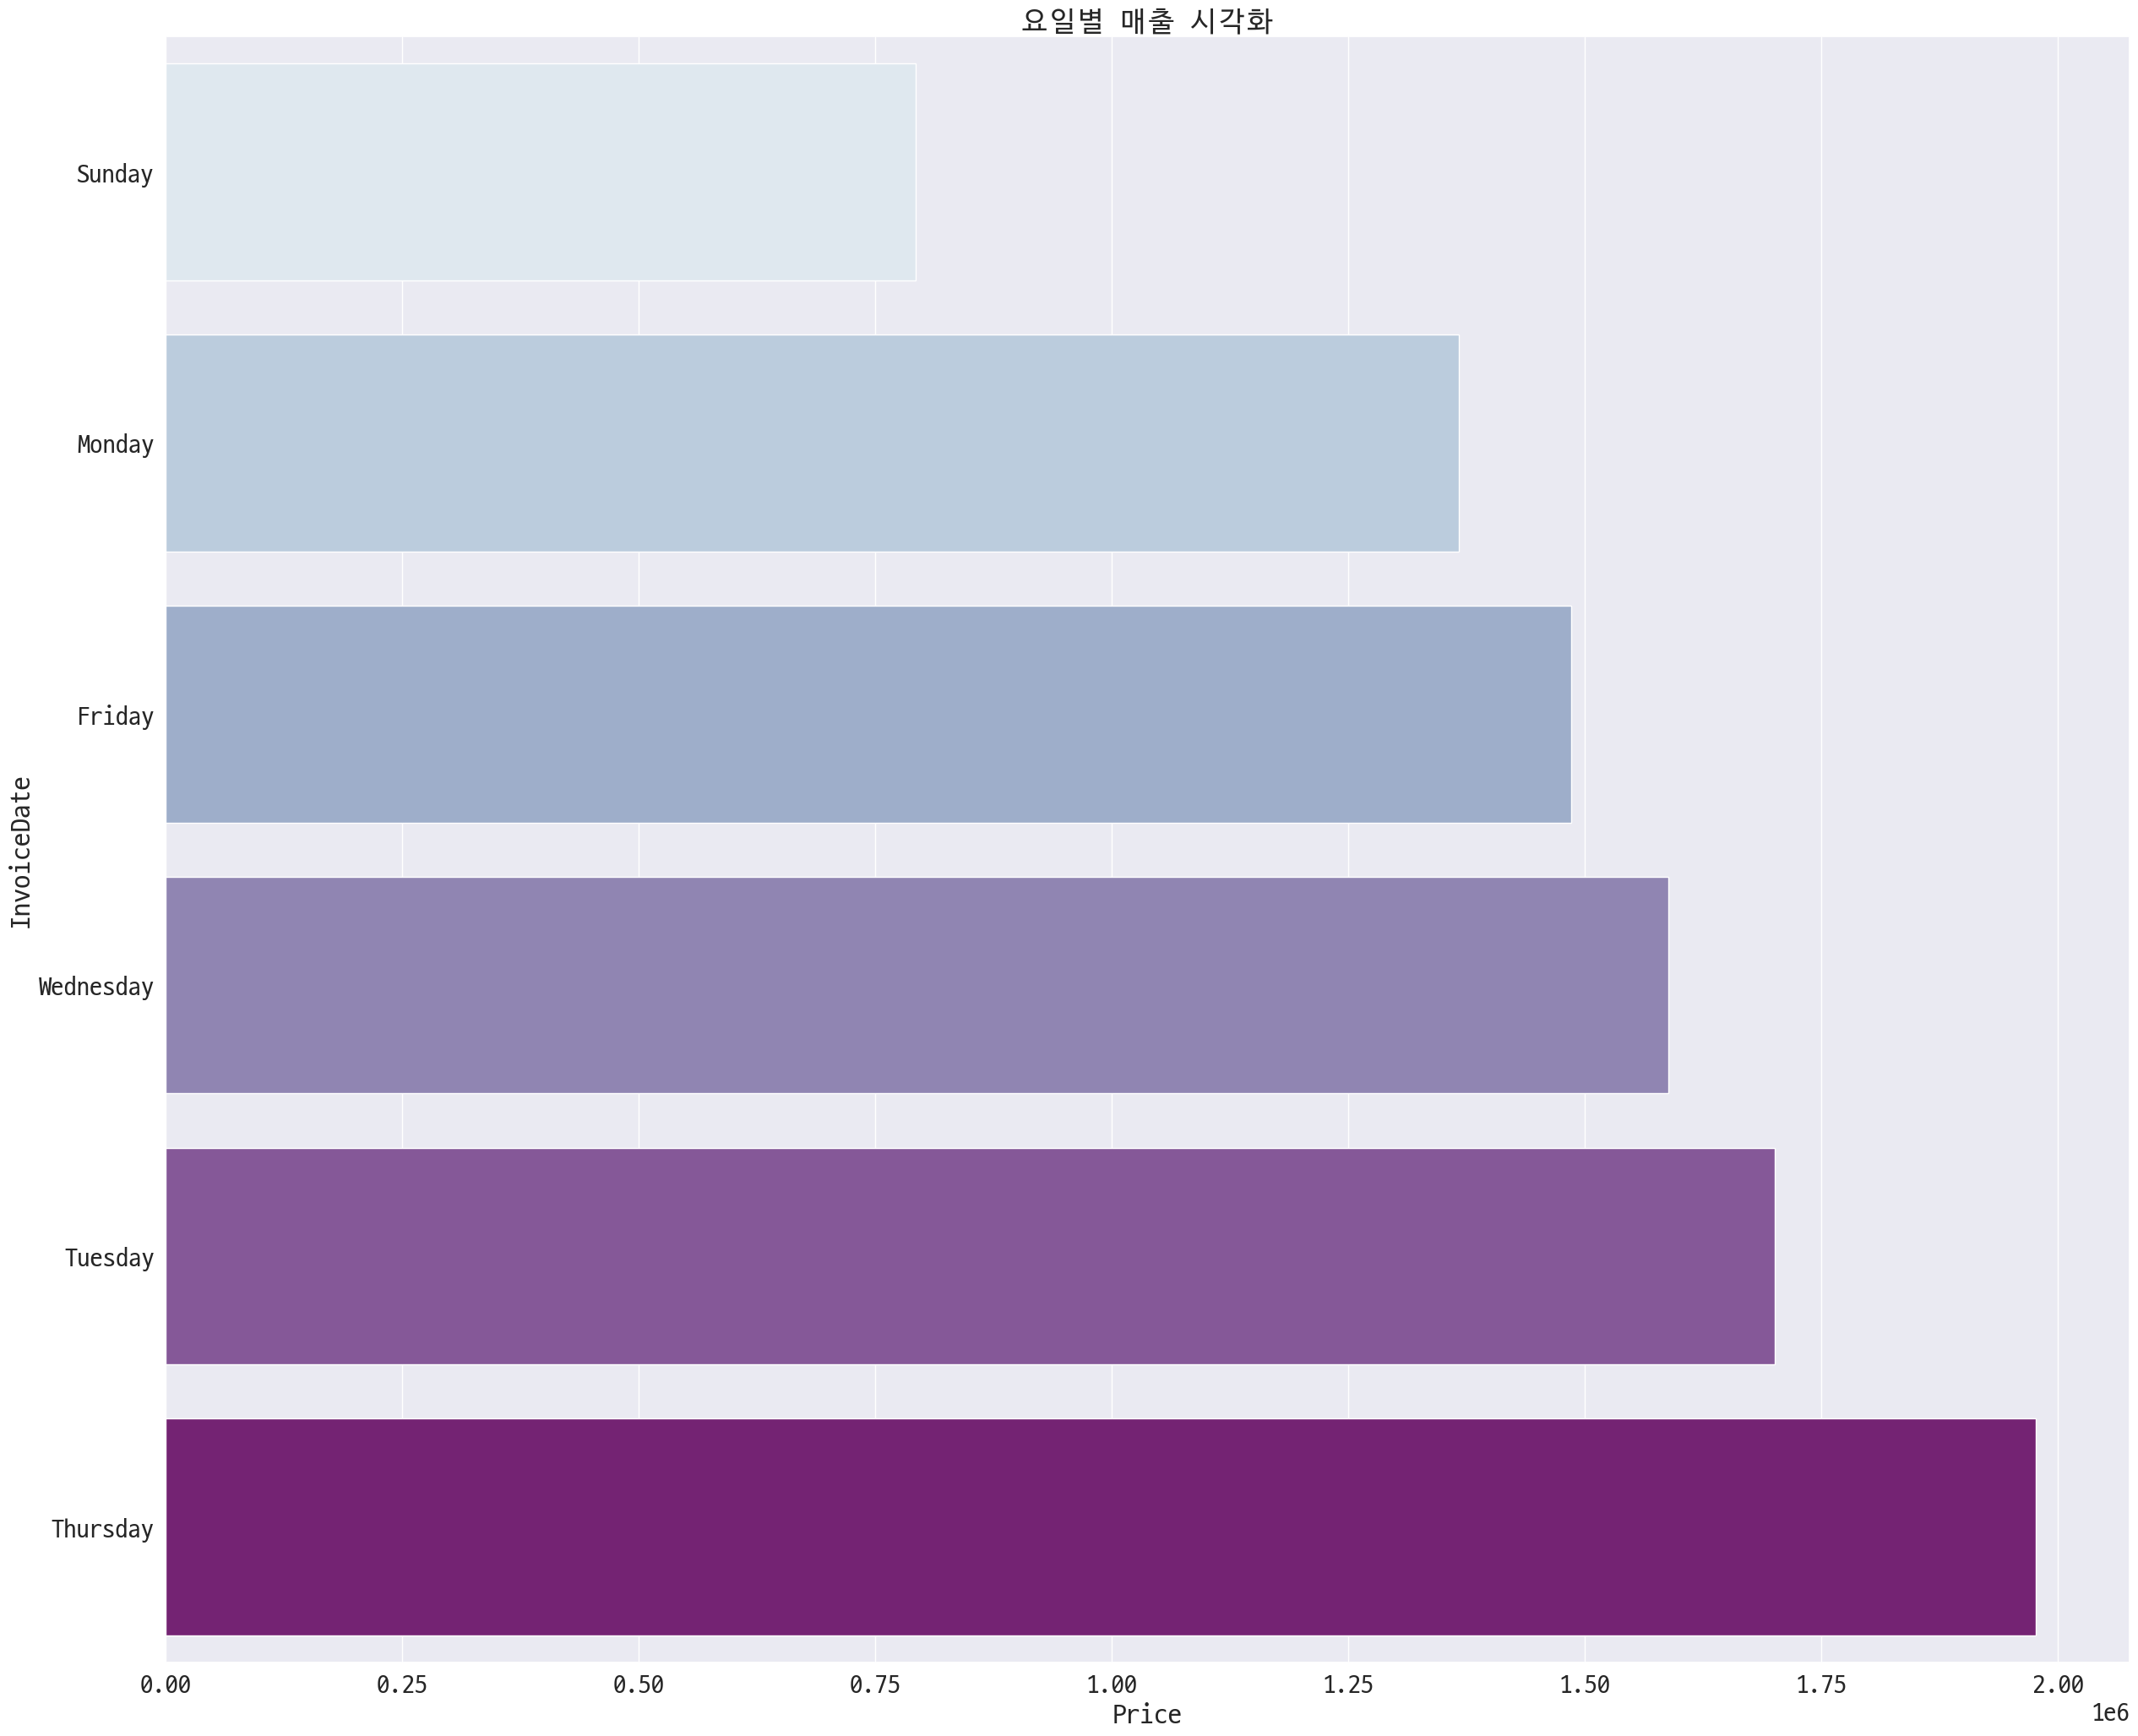

In [99]:
mpl.rcParams['font.family'] = 'D2coding'
sns.barplot(x = d_price, y = d_price.index, palette='BuPu')
sns.set(font_scale=2)
plt.title('요일별 매출 시각화')
plt.rc('figure', figsize=(30,25))
plt.show()

## 시간대별 매출, 상위 매출 제품의 월별 판매량 추이

In [109]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Price
InvoiceDate,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850,United Kingdom,15.30
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850,United Kingdom,20.34
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850,United Kingdom,22.00
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850,United Kingdom,20.34
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850,United Kingdom,20.34
2010-12-01 08:26:00,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,7.65,17850,United Kingdom,15.30
2010-12-01 08:26:00,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,4.25,17850,United Kingdom,25.50
2010-12-01 08:28:00,536366,22633,HAND WARMER UNION JACK,6,1.85,17850,United Kingdom,11.10
2010-12-01 08:28:00,536366,22632,HAND WARMER RED POLKA DOT,6,1.85,17850,United Kingdom,11.10


In [115]:
top_10 = df.groupby(df.index)['Price'].sum()
top_10_hour = top_10.sort_values(ascending = False).head(10)

<AxesSubplot:xlabel='Price', ylabel='InvoiceDate'>

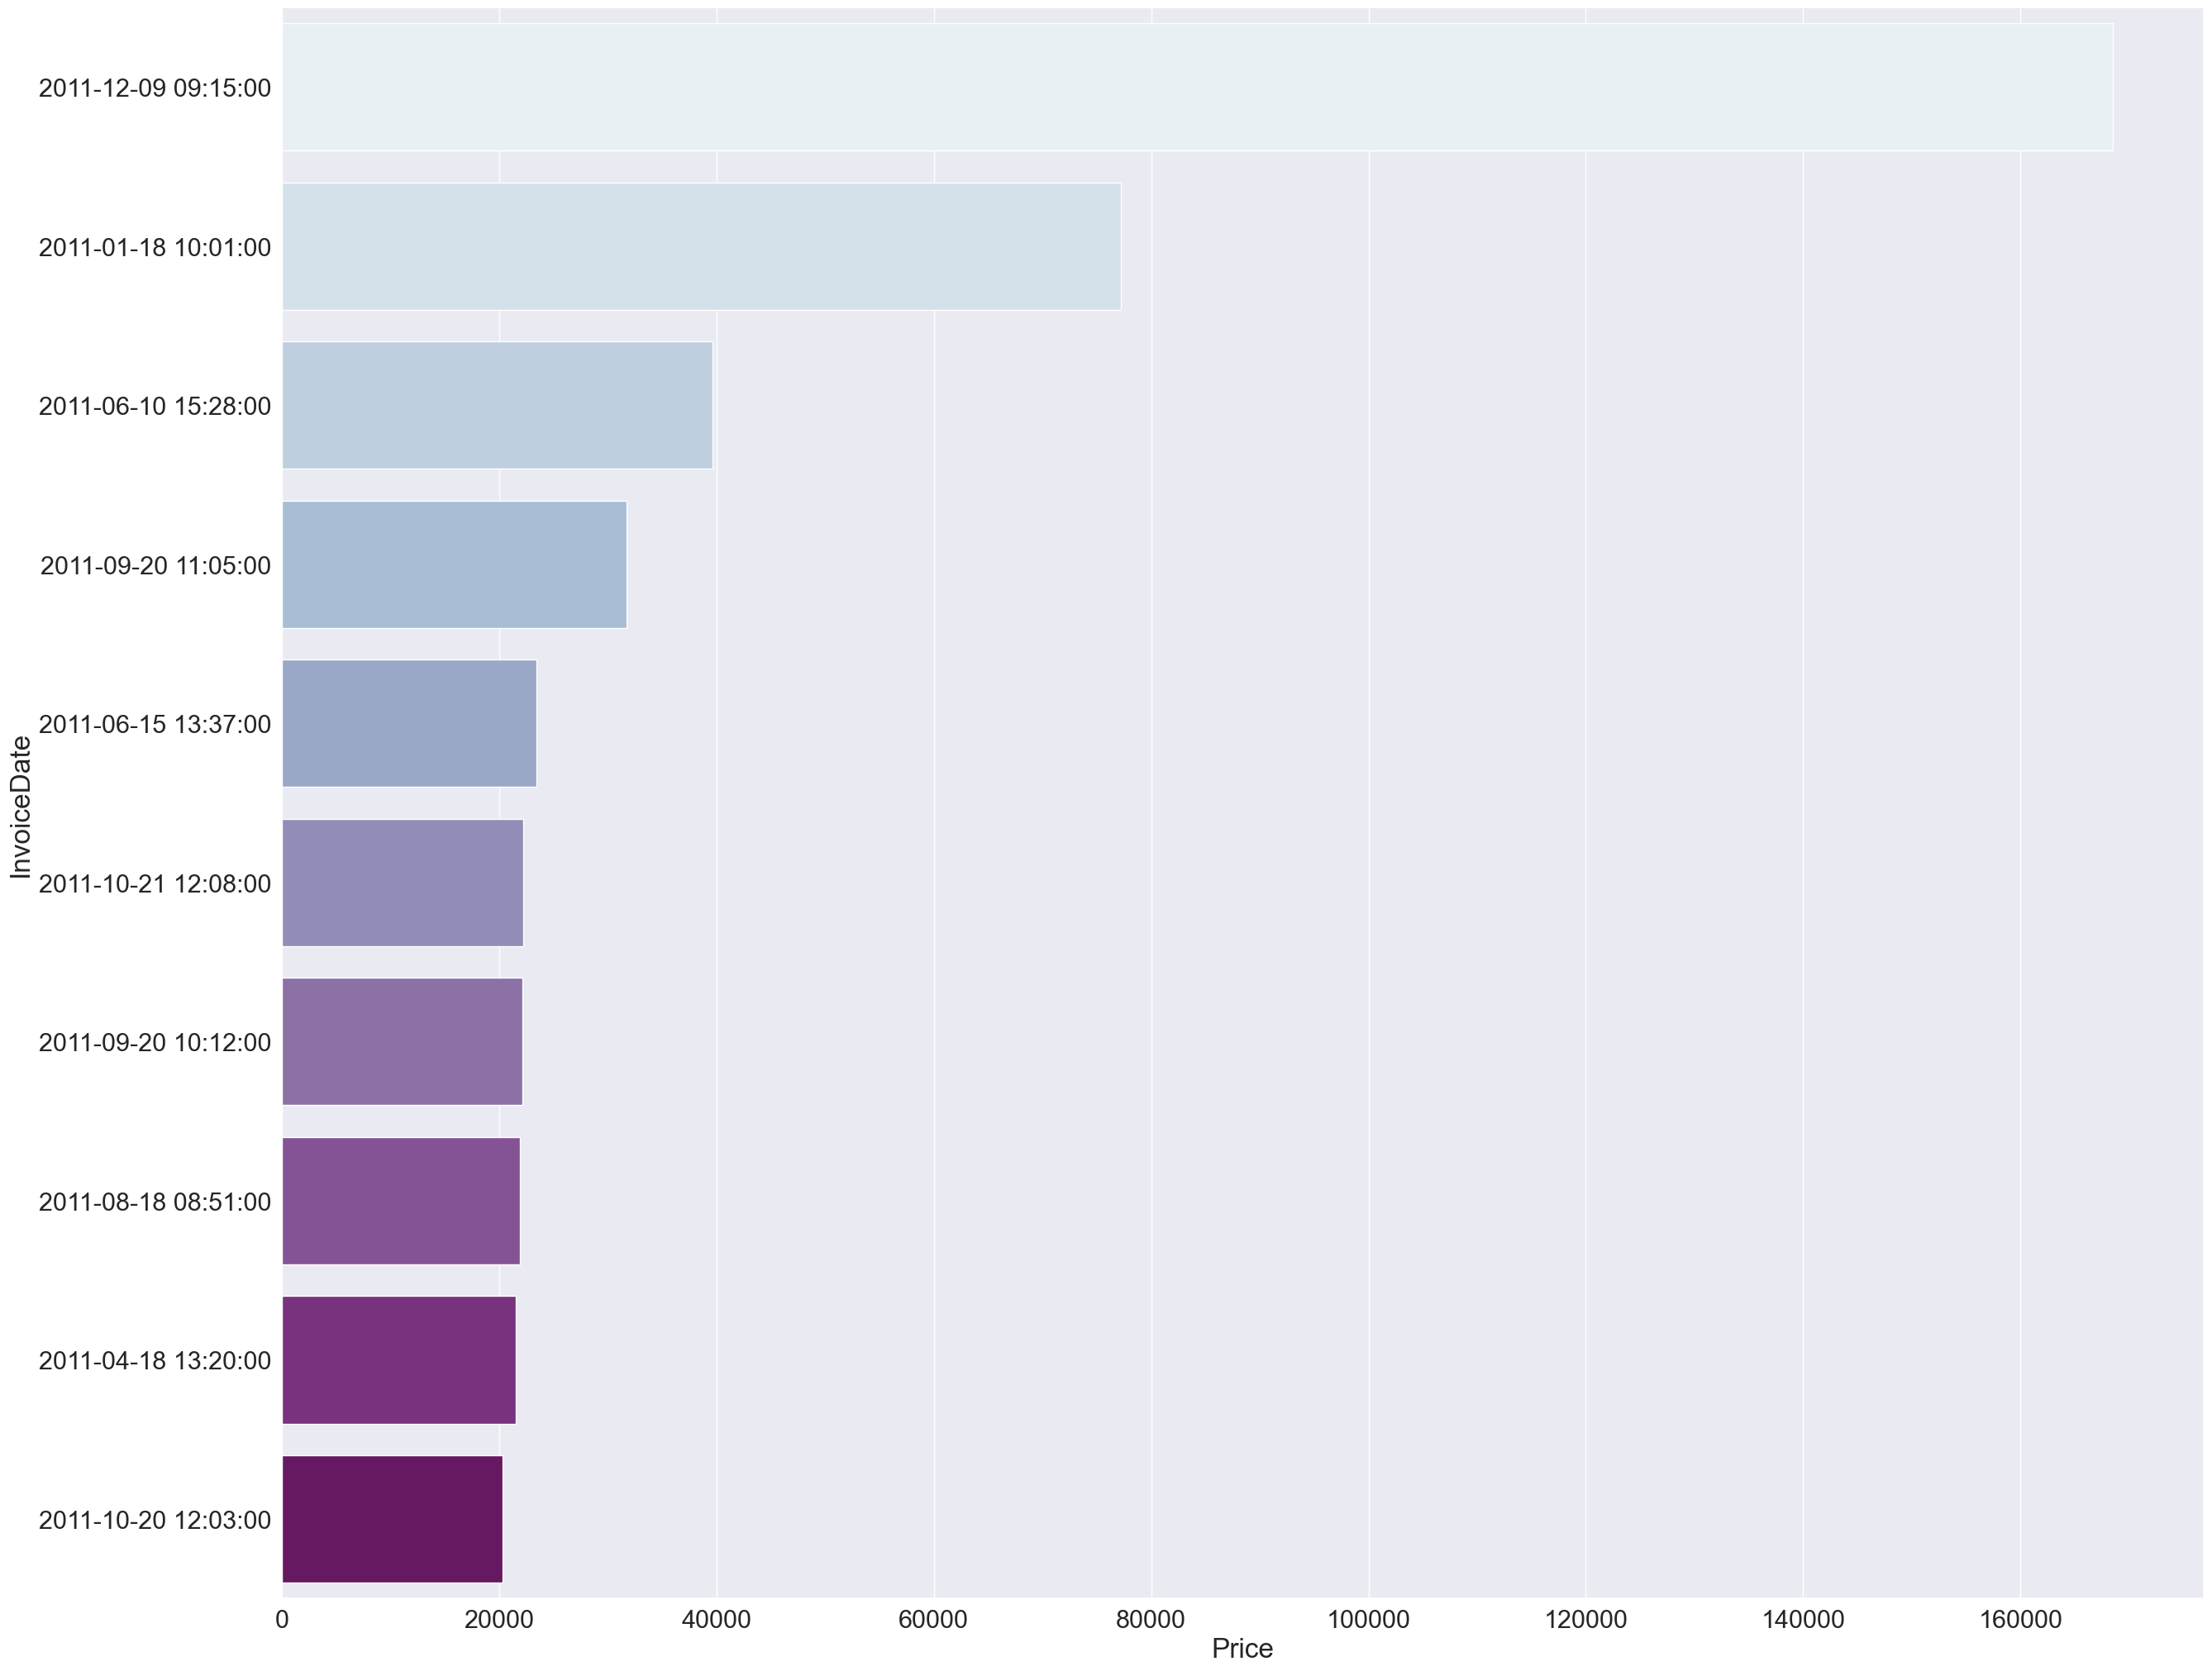

In [121]:
sns.barplot(x = top_10_hour, y = top_10_hour.index, palette = 'BuPu')

## 고객 코호트(cohort) 분석

## 우수 고객 찾기

In [158]:
Top_cus = df.groupby('CustomerID')['Price'].sum().sort_values(ascending = False).head(10)
Top_cus = pd.DataFrame(Top_cus).reset_index()
Top_cus


,CustomerID,Price
0,14646,280206.02
1,18102,259657.30
2,17450,194550.79
3,16446,168472.50
4,14911,143825.06
5,12415,124914.53
6,14156,117379.63
7,17511,91062.38
8,16029,81024.84
9,12346,77183.60


In [159]:
Top_cus['CustomerID'] = Top_cus['CustomerID'].astype('object')

In [166]:
Top_cus

,CustomerID,Price
0,14646,280206.02
1,18102,259657.30
2,17450,194550.79
3,16446,168472.50
4,14911,143825.06
5,12415,124914.53
6,14156,117379.63
7,17511,91062.38
8,16029,81024.84
9,12346,77183.60


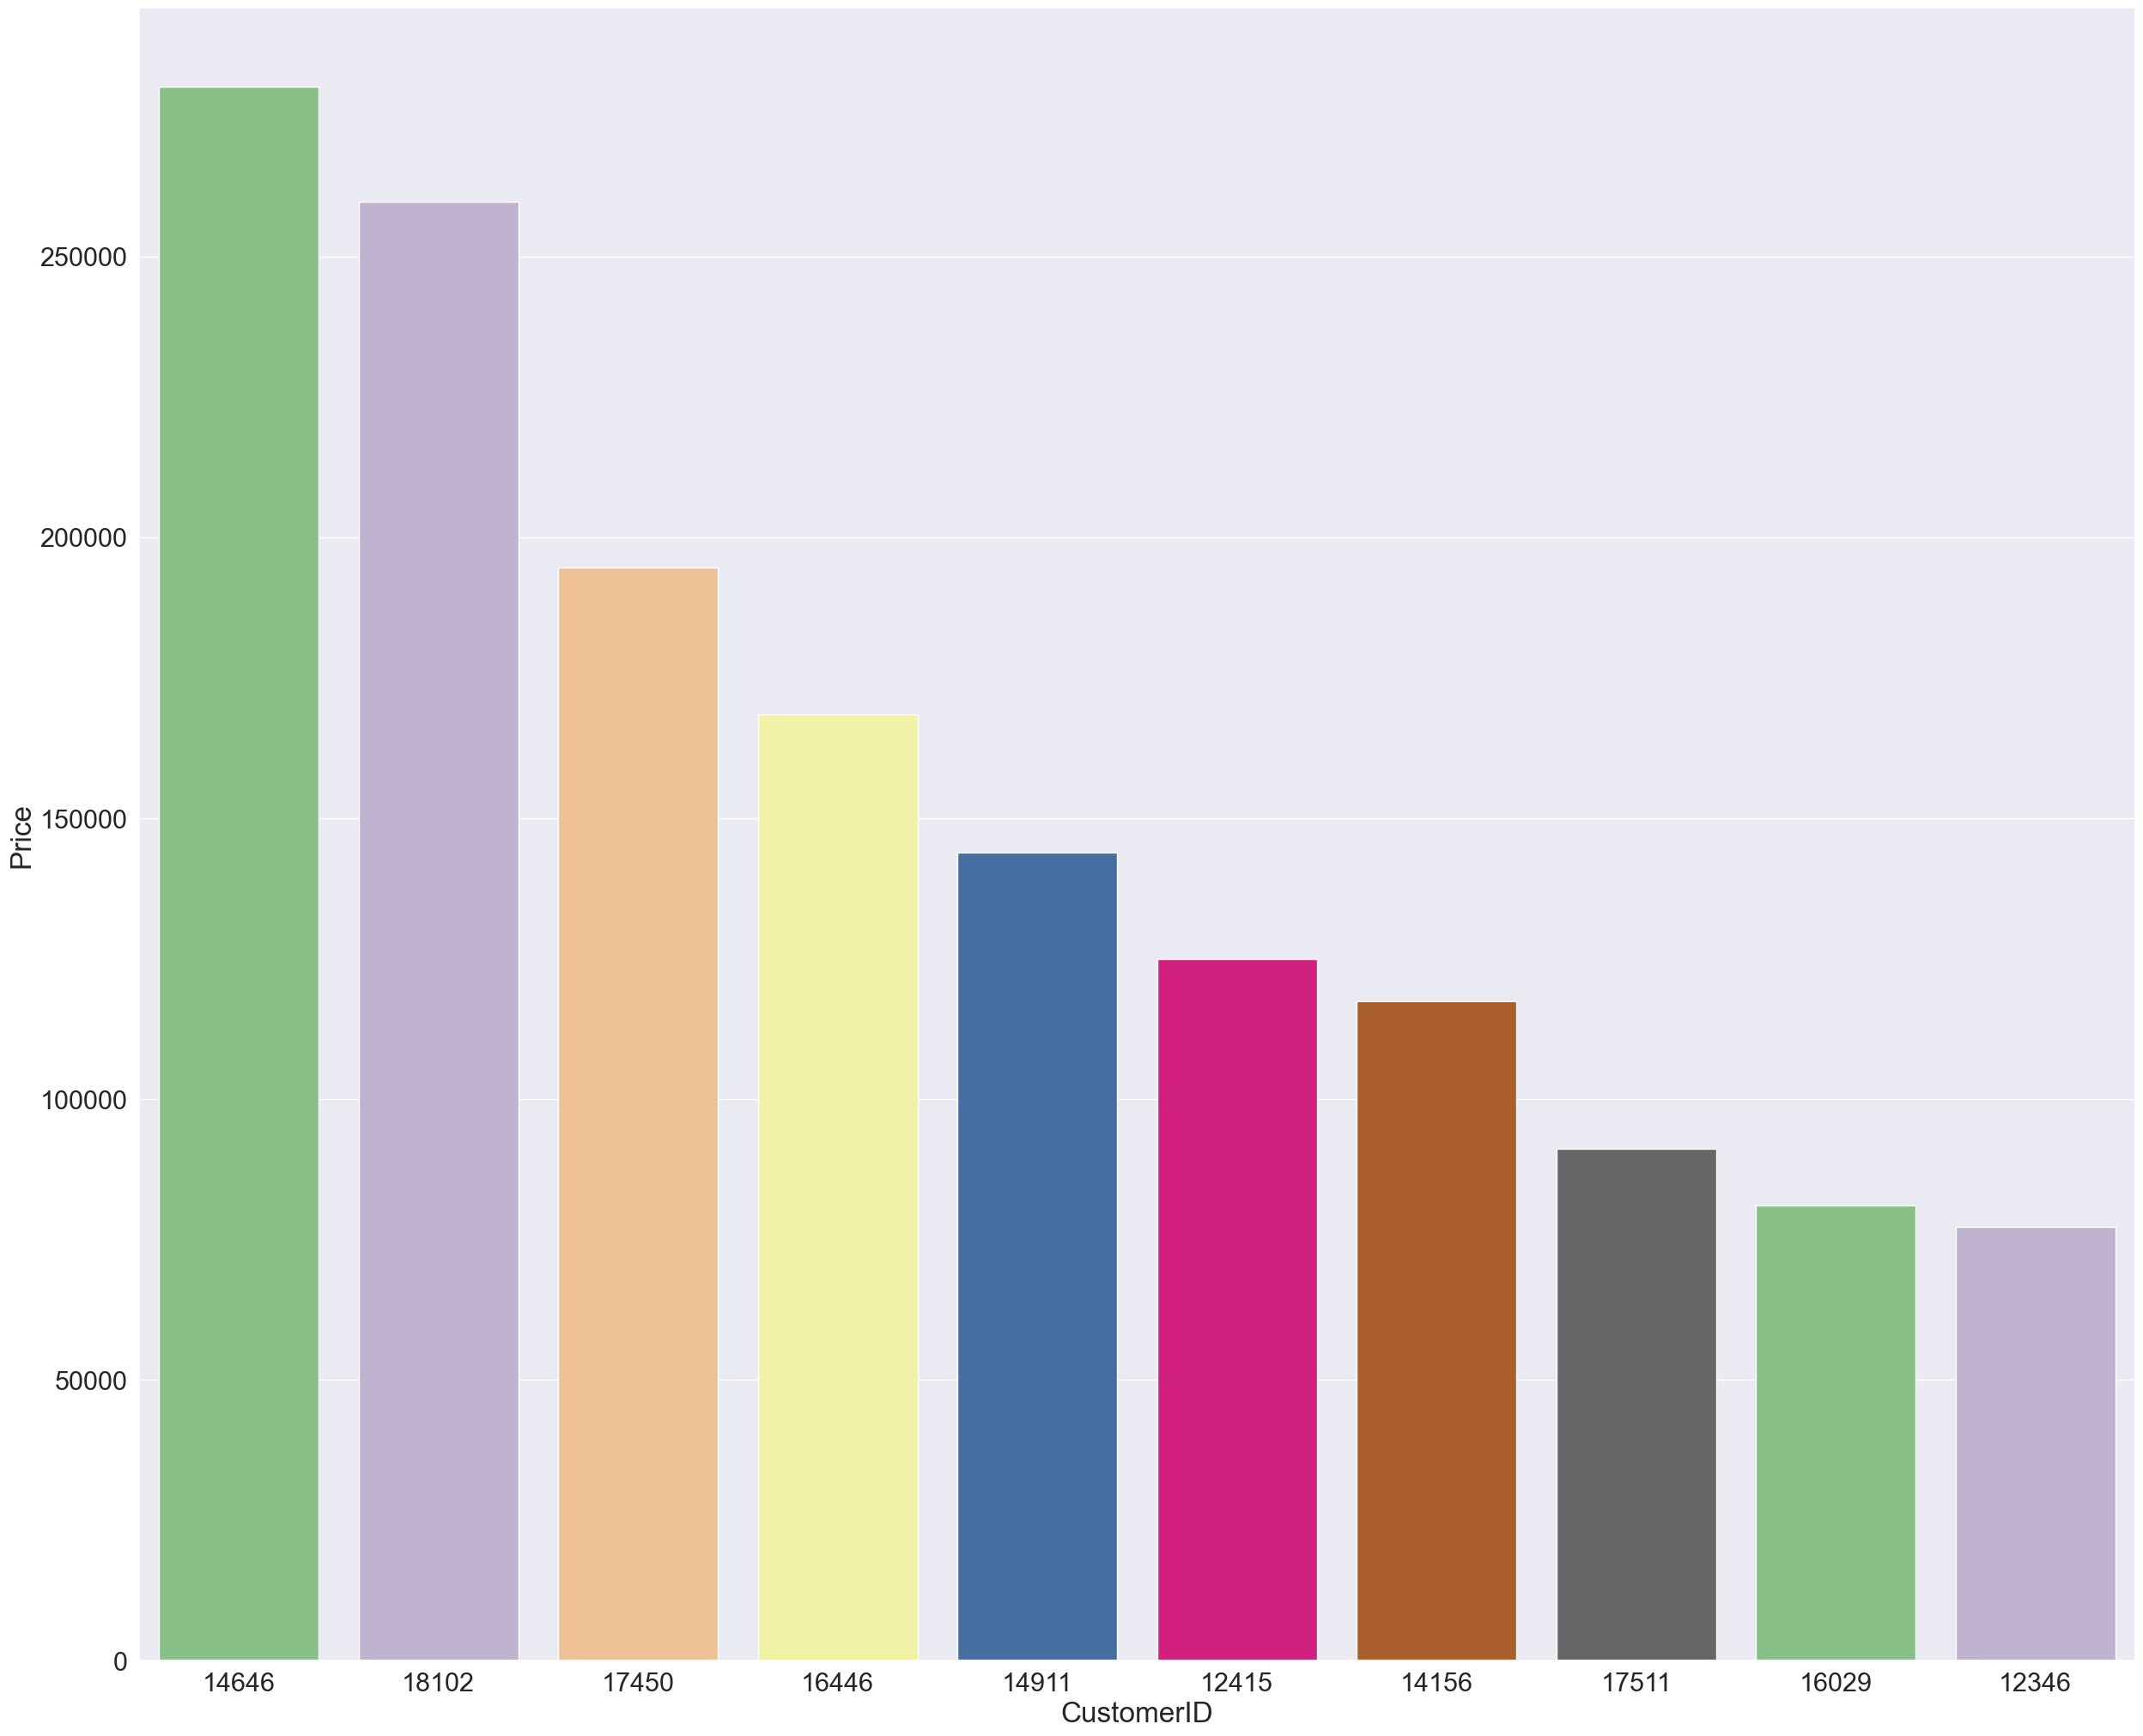

In [174]:
sns.barplot(data = Top_cus, x = 'CustomerID', y = 'Price', palette = 'Accent',  order=Top_cus['CustomerID'])
plt.show()

## 몇시에 push 마케팅을 하는게 제일 좋을까?

## 고객별 주문을 가장많이 하는 시간을?